In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
movies_df = pd.read_csv('Movie.csv')

In [46]:
movies_df.head(5)

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [48]:
movies_df.shape

(8992, 3)

In [49]:
movies_df[movies_df["userId"]==4]

,userId,movie,rating
5204,4,Heat (1995),3.0
7444,4,GoldenEye (1995),4.0


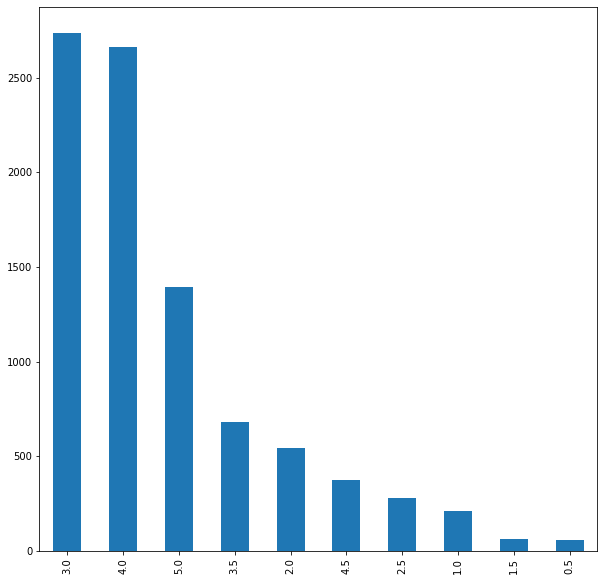

In [59]:
plt.figure(figsize=(10,10))
movies_df["rating"].value_counts().plot(kind="bar")

In [7]:
#number of unique users in the dataset
len(movies_df.userId.unique())

4081

In [8]:
len(movies_df.movie.unique())

10

In [9]:
movies_df.movie.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [60]:
user_movies_df = movies_df.pivot(index='userId',
                                 columns='movie',
                                 values='rating')

In [62]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [63]:
#Impute those NaNs with 0 values
user_movies_df.fillna(0, inplace=True)

In [65]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [67]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [68]:
import scipy

In [70]:
user_sim = 1 - pairwise_distances( user_movies_df.values,metric='cosine')

In [71]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [72]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [73]:
user_sim_df.shape

(4081, 4081)

In [74]:
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [75]:
#Set the index and column names to user ids 
user_sim_df.index = list(user_movies_df.index)
user_sim_df.columns = list(user_movies_df.index)

In [76]:
user_sim_df.iloc[0:5, 0:5]

,1,2,3,4,5
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0


In [79]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,1,2,3,4,5
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0


In [80]:
user_sim_df

,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
5,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7116,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7117,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7119,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [81]:
user_sim_df.sort_values([8],ascending=False).head(100)

,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
4831,0.000000,0.555136,0.555136,0.618580,0.000000,0.578181,0.392541,0.995703,0.555136,0.716360,...,0.475831,0.555136,0.000000,0.392541,0.616849,0.000000,0.417782,0.900596,0.555136,0.345596
614,0.000000,0.520266,0.520266,0.676346,0.000000,0.541863,0.367884,0.992625,0.520266,0.707458,...,0.520266,0.520266,0.000000,0.367884,0.674453,0.000000,0.391540,0.905125,0.520266,0.323888
2274,0.000000,0.482418,0.422116,0.759809,0.000000,0.463191,0.341121,0.972373,0.422116,0.632564,...,0.542720,0.422116,0.000000,0.298481,0.767523,0.000000,0.317675,0.913063,0.422116,0.262785
5043,0.000000,0.420589,0.600842,0.672943,0.000000,0.555383,0.297402,0.968856,0.600842,0.758666,...,0.480673,0.600842,0.000000,0.424859,0.679775,0.000000,0.452180,0.909761,0.600842,0.374050
5843,0.000000,0.380235,0.633724,0.671748,0.000000,0.561026,0.268866,0.959475,0.633724,0.800186,...,0.506979,0.633724,0.000000,0.448111,0.672166,0.000000,0.476926,0.894126,0.633724,0.394521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,0.000000,0.404226,0.646762,0.388057,0.000000,0.578883,0.285831,0.806060,0.646762,0.565371,...,0.000000,0.646762,0.000000,0.457330,0.457330,0.000000,0.486738,0.853169,0.646762,0.402637
188,0.000000,0.218218,0.654654,0.567367,0.000000,0.511372,0.154303,0.805823,0.654654,0.678246,...,0.218218,0.654654,0.000000,0.462910,0.617213,0.218218,0.636375,0.851064,0.654654,0.407550
2140,0.000000,0.512148,0.512148,0.384111,0.000000,0.533407,0.362143,0.803773,0.512148,0.447697,...,0.000000,0.512148,0.000000,0.362143,0.452679,0.256074,0.554056,0.837150,0.512148,0.318834
271,0.435194,0.609272,0.261116,0.487417,0.435194,0.407934,0.430820,0.803530,0.261116,0.524145,...,0.609272,0.261116,0.435194,0.492366,0.430820,0.000000,0.196510,0.609026,0.261116,0.403380


In [84]:
#Most Similar Users
#user_sim_df.idxmax(axis=1)[0:10]

In [83]:
movies_df[(movies_df['userId']==8) | (movies_df['userId']==6636)]

,userId,movie,rating
2,8,Toy Story (1995),4.0
2406,6636,Toy Story (1995),4.0
3727,8,Grumpier Old Men (1995),5.0
4365,6636,Grumpier Old Men (1995),2.5
5205,8,Heat (1995),3.0
6388,6636,Heat (1995),4.0
7445,8,GoldenEye (1995),4.0


In [100]:
def give_reco(customer_id):
    tem=list(user_sim_df.sort_values([customer_id],ascending=False).head(100).index)
    movie_list=[]
    for i in tem:
        movie_list=movie_list+list(movies_df[movies_df["userId"]==i]["movie"])

    return set(movie_list)-set(movies_df[movies_df["userId"]==customer_id]["movie"])
    

In [105]:
give_reco(11)

{'Heat (1995)', 'Jumanji (1995)', 'Waiting to Exhale (1995)'}